In [ ]:
!pip install streamlit

  Using cached streamlit-1.42.0-py2.py3-none-any.whl.metadata (8.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
!streamlit --version

Streamlit, version 1.42.0


In [ ]:
!apt install cloudflared

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package cloudflared


2025-02-15 03:17:59.252 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.307 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-15 03:17:59.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-15 03:17:59.319 Thread 'MainThread': mi

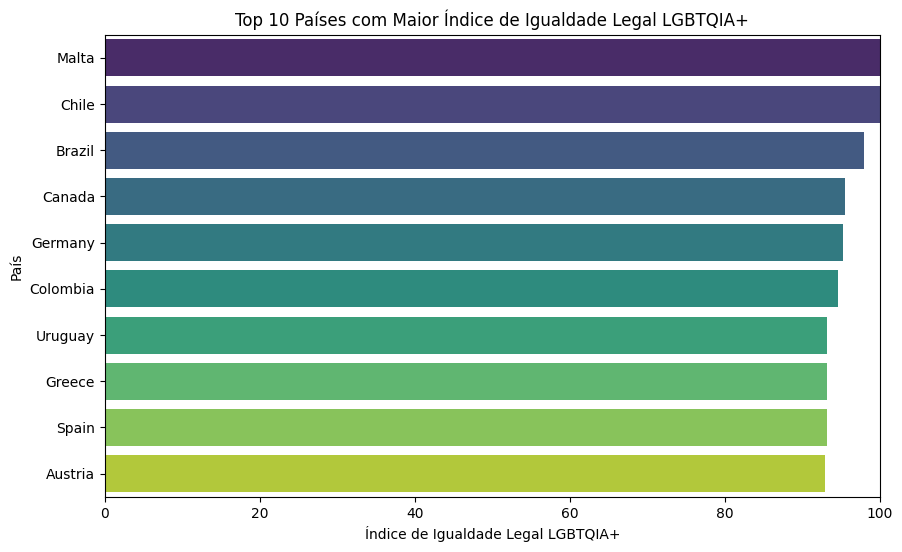

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
dados = pd.read_csv('lgbt-legal-equality-index.csv')
dados.columns = dados.columns.str.strip()
dados = dados.sort_values(by=['Entity', 'Year'], ascending=[True, False]).drop_duplicates(subset=['Entity'])
dados = dados.dropna(subset=['ei_legal'])
dados['seguro'] = (dados['ei_legal'] >= 70).astype(int)

# Treinar o modelo
X = dados[['ei_legal']]
y = dados['seguro']
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Função de predição
def prever_seguranca(pais):
    if pais not in dados['Entity'].values:
        return 'País não encontrado.'
    valor_ei_legal = dados.loc[dados['Entity'] == pais, 'ei_legal'].values[0]
    previsao = modelo.predict([[valor_ei_legal]])[0]
    return 'Seguro 🏳️‍🌈✅' if previsao == 1 else 'Não seguro ❌'

# Criar o dashboard
st.title('🌍 Segurança LGBTQIA+ por País')
st.write('Previsão baseada no índice de igualdade legal LGBTQIA+.')

# Seleção de país
pais_escolhido = st.selectbox('Escolha um país:', sorted(dados['Entity'].unique()))
resultado = prever_seguranca(pais_escolhido)
st.write(f'### {pais_escolhido}: {resultado}')

# Gráfico dos 10 países mais seguros
top_10_paises = dados.sort_values(by='ei_legal', ascending=False).head(10)
st.subheader('🌟 Top 10 Países Mais Seguros')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_10_paises, x='ei_legal', y='Entity', hue='Entity', palette='viridis', legend=False)
ax.set_xlabel('Índice de Igualdade Legal LGBTQIA+')
ax.set_ylabel('País')
ax.set_xlim(0, 100)
ax.set_title('Top 10 Países com Maior Índice de Igualdade Legal LGBTQIA+')
st.pyplot(fig)

# Exibir dados
toggle = st.checkbox('📊 Mostrar dados brutos')
if toggle:
    st.write(dados[['Entity', 'ei_legal', 'seguro']])

In [ ]:
!streamlit run app.py & npx cloudflared tunnel --url http://localhost:8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.133.253:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
cloudflared@0.7.0
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧2025-02-15T03:31:51Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-02-15T03:31:51Z INF Requesting new quick Tunnel on trycloudflare.com...
202